# 05. LASSO Model

**Mô hình:** LASSO Regression (L1 regularization)

**Thư viện:** sklearn.linear_model.Lasso

**Metrics:** RMSFE, MAPE

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
sys.path.append(os.path.abspath(os.path.join('..')))

In [2]:

train_path = '../data/processed/train_clean.csv'
test_path = '../data/processed/test_clean.csv'

train_df = pd.read_csv(train_path, index_col=0, parse_dates=True)
test_df = pd.read_csv(test_path, index_col=0, parse_dates=True)

print(f"Train shape: {train_df.shape}")
print(f"Test shape: {test_df.shape}")

TARGET_COL = 'Core CPI' 
X_train = train_df.drop(columns=[TARGET_COL])
y_train = train_df[TARGET_COL]

X_test = test_df.drop(columns=[TARGET_COL])
y_test = test_df[TARGET_COL]

print("Dữ liệu đã sẵn sàng!")

Train shape: (112, 190)
Test shape: (28, 190)
Dữ liệu đã sẵn sàng!


In [3]:

lasso = Lasso(random_state=42, max_iter=50000) 
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 0.5, 1, 10]
}
#Cross-Validation theo chuỗi thời gian (5 splits)
tscv = TimeSeriesSplit(n_splits=5)
grid_search = GridSearchCV(
    estimator=lasso,
    param_grid=param_grid,
    cv=tscv,
    scoring='neg_root_mean_squared_error', # Sklearn dùng negative RMSE để tối ưu
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

best_lasso = grid_search.best_estimator_
print(f"\nBest Alpha: {grid_search.best_params_['alpha']}")

Fitting 5 folds for each of 7 candidates, totalling 35 fits

Best Alpha: 0.001


RMSE: 0.1549
MAPE: 21.76%


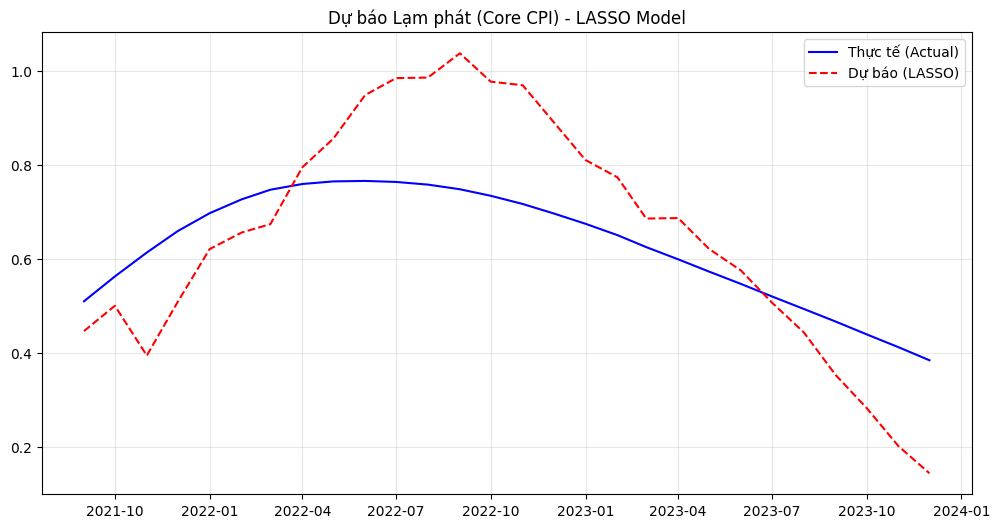

In [4]:

y_pred_lasso = best_lasso.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
mape = mean_absolute_percentage_error(y_test, y_pred_lasso)

print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.2%}")


plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Thực tế (Actual)', color='blue')
plt.plot(y_test.index, y_pred_lasso, label='Dự báo (LASSO)', color='red', linestyle='--')
plt.title('Dự báo Lạm phát (Core CPI) - LASSO Model')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [5]:
os.makedirs('../results/tables', exist_ok=True)

results_df = pd.DataFrame({'Actual': y_test, 'Predicted_LASSO': y_pred_lasso}, index=y_test.index)
results_df.to_csv('../results/tables/lasso_predictions.csv')
print("Đã lưu kết quả vào ../results/tables/lasso_predictions.csv")

Đã lưu kết quả vào ../results/tables/lasso_predictions.csv
